# Sales & Customer Behaviour Insights – Green Cart Ltd.

## 1. Loading the Data

In [356]:
# Impoting necessary libraries.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [357]:
# Getting the data.
sales = pd.read_csv(r'C:\Users\RAMIL\Downloads\Project Files-20251230T211454Z-3-001\Project Files\sales_data.csv')
products = pd.read_csv(r'C:\Users\RAMIL\Downloads\Project Files-20251230T211454Z-3-001\Project Files\product_info.csv')
customers = pd.read_csv(r'C:\Users\RAMIL\Downloads\Project Files-20251230T211454Z-3-001\Project Files\customer_info.csv')

In [358]:
# Obsvering the data.
sales.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,06-07-2025,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,06-07-2025,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,07-07-2025,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,08-07-2025,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1,47.62,08-07-2025,DELAYED,Credit Card,West,0.20


In [359]:
products.head()

,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,15-07-24,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,19-04-25,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,20-10-24,31.10,S559


In [360]:
customers.head()

,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,26-04-25,Male,Central,Silver
1,C00002,jpeterson@bernard.com,11-08-24,Female,Central,gold
2,C00003,howardmaurice@yahoo.com,15-05-25,male,Central,gold
3,C00004,yherrera@arnold.org,14-06-25,FEMALE,Central,GOLD
4,C00005,janetwilliams@gmail.com,02-05-25,Male,West,bronze


## 2. Cleaning the Data

In [362]:
# Making sure the column names are consistent.
sales.columns = sales.columns.str.strip().str.lower()
products.columns = products.columns.str.strip().str.lower()
customers.columns = customers.columns.str.strip().str.lower()

### Sales Table

In [364]:
# Getting information about the columns of the 'sales' data.
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2999 non-null   object 
 1   customer_id       2998 non-null   object 
 2   product_id        2995 non-null   object 
 3   quantity          2997 non-null   object 
 4   unit_price        2999 non-null   float64
 5   order_date        2998 non-null   object 
 6   delivery_status   2997 non-null   object 
 7   payment_method    2997 non-null   object 
 8   region            3000 non-null   object 
 9   discount_applied  2483 non-null   float64
dtypes: float64(2), object(8)
memory usage: 234.5+ KB


In [365]:
# Converting the datatype of 'order_date' column to datetime.
sales['order_date'] = pd.to_datetime(sales['order_date'], errors = 'coerce')

In [366]:
# Converting the datatype of 'quantity' column to numerical.
sales['quantity'] = pd.to_numeric(sales['quantity'], errors = 'coerce')

In [367]:
# Checking unique values in 'delivery_status' column to see potential inconsistencies.
sales['delivery_status'].unique()

array(['Delivered', ' DELAYED', 'delivered', ' Cancelled ', 'Delayed',
       'delrd', 'delyd', nan], dtype=object)

In [368]:
# Normalizing the column 'delivery_status' in 'sales' data.
sales['delivery_status'] = (sales['delivery_status'].str.strip().map({'delrd': 'Delivered', 'delyd': 'Delayed'}).fillna(sales['delivery_status']))
sales['delivery_status'] = sales['delivery_status'].str.strip().str.title()

In [369]:
# Checking the result.
sales['delivery_status'].unique()

array(['Delivered', 'Delayed', 'Cancelled', nan], dtype=object)

In [370]:
# Checking unique values in 'payment_method' column to see potential inconsistencies.
sales['payment_method'].unique()

array(['PayPal', 'credit card', 'Bank Transfer', 'Credit Card', nan,
       'bank transfr'], dtype=object)

In [371]:
# Normalizing the column 'payment_method' in 'sales' data.
sales['payment_method'] = (sales['payment_method'].str.strip().map({'bank transfr': 'Bank Transfer'}).fillna(sales['payment_method']))
sales['payment_method'] = sales['payment_method'].str.strip().str.title()

In [372]:
# Checking the result.
sales['payment_method'].unique()

array(['Paypal', 'Credit Card', 'Bank Transfer', nan], dtype=object)

In [373]:
# Checking unique values in 'region' column to see potential inconsistencies.
sales['region'].unique()

array(['Central', 'North', 'West', 'East', 'South', 'nrth'], dtype=object)

In [374]:
# Normalizing the column 'region' in 'sales' data.
sales['region'] = (sales['region'].str.strip().map({'nrth': 'North'}).fillna(sales['region']))

In [375]:
# Checking the result.
sales['region'].unique()

array(['Central', 'North', 'West', 'East', 'South'], dtype=object)

#### Handling Missing Values

In [377]:
# Observing how many null value we have got in each column of the 'sales' data.
sales.isnull().sum()

order_id               1
customer_id            2
product_id             5
quantity               5
unit_price             1
order_date          1820
delivery_status        3
payment_method         3
region                 0
discount_applied     517
dtype: int64

_**I have to drop a row where 'order_id' is null as it is the primary column of this table and it should be non-null.**_

_**I will drop rows where 'customer_id' and 'product_id' columns are null as the number of null values is small and while merging the table these null values will create problems.**_

_**I will drop rows where 'quantity' and 'unit_price' columns are null as these are the core business metrics and any imputation would distort revenue, margins, KPIs.**_

_**I will ignore null values in 'order_date' column as droping valid transactons becuse of missing date is not right and logically imputing these missing values is not possible either. We just need to exclude them from Time-Series Analysis.**_

_**I will treat null values in columns like 'delivery_status' and 'payment_method' as their own category (unknown).**_

_**I will fill missing values inside 'discount_applied' column with 0.0.**_

In [384]:
sales = sales.dropna(subset = ['order_id', 'customer_id', 'product_id', 'quantity', 'unit_price'])

In [385]:
sales[['delivery_status', 'payment_method']] = (sales[['delivery_status', 'payment_method']].fillna('Unknown'))

In [386]:
sales['discount_applied'] = sales['discount_applied'].fillna(0.0)

In [387]:
# Observing the results.
sales.isnull().sum()

order_id               0
customer_id            0
product_id             0
quantity               0
unit_price             0
order_date          1813
delivery_status        0
payment_method         0
region                 0
discount_applied       0
dtype: int64

In [388]:
# Seeing the number of duplicates in the 'sales' table.
sales.duplicated().sum()

0

_**We do not have duplicate rows in customers table.**_

In [390]:
# I will drop duplicates according to the 'order_id'.
sales = sales.drop_duplicates(subset = 'order_id')

In [391]:
(sales[['quantity', 'unit_price', 'discount_applied']] >= 0).all().all()

True

_**All values in these columns are non-negative which is very logical.**_

### Products Table

In [394]:
# Getting information about the columns of the 'products' data.
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     30 non-null     object 
 1   product_name   30 non-null     object 
 2   category       30 non-null     object 
 3   launch_date    30 non-null     object 
 4   base_price     30 non-null     float64
 5   supplier_code  30 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.5+ KB


In [395]:
# Converting the datatype of 'launch_date' column to datetime.
products['launch_date'] = pd.to_datetime(products['launch_date'], errors = 'coerce')

In [396]:
# Checking unique values in 'category' column to see potential inconsistencies.
products['category'].unique()

array(['Storage', 'Cleaning', 'Kitchen', 'Personal Care', 'Outdoors'],
      dtype=object)

#### Handling Missing Values

In [398]:
# Observing how many null value we have got in each column of the 'products' data.
products.isnull().sum()

product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64

_**We have got no null values inside 'products' table.**_

#### Handling Duplicates

In [401]:
# Seeing the number of duplicates in the 'products' table.
products.duplicated().sum()

0

_**We do not have duplicate rows in products table.**_

In [403]:
# I will drop duplicates according to the 'product_id'.
products = products.drop_duplicates(subset = 'product_id')

### Customers Table

In [405]:
# Getting information about the columns of the 'customers' data.
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   497 non-null    object
 1   email         494 non-null    object
 2   signup_date   496 non-null    object
 3   gender        496 non-null    object
 4   region        497 non-null    object
 5   loyalty_tier  498 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [406]:
# Converting the datatype of 'signup_date' column to datetime.
customers['signup_date'] = pd.to_datetime(customers['signup_date'], errors = 'coerce')

In [407]:
# Checking unique values in 'gender' column to see potential inconsistencies.
customers['gender'].unique()

array(['Male', 'Female', 'male', 'FEMALE', 'Other', 'femle', nan],
      dtype=object)

In [408]:
# Normalizing the column 'gender' in 'customers' data.
customers['gender'] = (customers['gender'].str.strip().map({'femle': 'Female'}).fillna(customers['gender']))
customers['gender'] = customers['gender'].str.strip().str.title()

In [409]:
# Checking the results.
customers['gender'].unique()

array(['Male', 'Female', 'Other', nan], dtype=object)

In [410]:
# Checking unique values in 'region' column to see potential inconsistencies.
customers['region'].unique()

array(['Central', 'West', 'North', 'South', 'East', nan], dtype=object)

In [411]:
# Checking unique values in 'loyalty_tier' column to see potential inconsistencies.
customers['loyalty_tier'].unique()

array(['Silver', ' gold ', 'GOLD', 'bronze', 'gld', nan, 'brnze',
       'sllver'], dtype=object)

In [412]:
# Normalizing the column 'loyalty_tier' in 'customers' data.
customers['loyalty_tier'] = (customers['loyalty_tier'].str.strip().map({'gld': 'Gold', 'brnze': 'Bronze', 'sllver': 'Silver'}).fillna(customers['loyalty_tier']))
customers['loyalty_tier'] = customers['loyalty_tier'].str.strip().str.title()

In [413]:
# Checking the results.
customers['loyalty_tier'].unique()

array(['Silver', 'Gold', 'Bronze', nan], dtype=object)

#### Handling Missing Values

In [415]:
# Observing how many null value we have got in each column of the 'customers' data.
customers.isnull().sum()

customer_id     3
email           6
signup_date     4
gender          4
region          3
loyalty_tier    2
dtype: int64

_**I will drop rows where 'customer_id' column is null as this is the primary column of this table and should be non-null.**_

_**I will ignore null values in columns like 'email' and 'signup_date' as logically imputing these columns is not possible and droping rows because of them is not the right move either.**_

_**I will treat null values inside categorical columns like 'gender', 'region' and 'loyalty_tier' as their own category ('Unknown').**_

In [419]:
customers = customers.dropna(subset = ['customer_id'])
customers[['gender', 'region', 'loyalty_tier']] = (customers[['gender', 'region', 'loyalty_tier']].fillna('Unknown'))

In [420]:
# Checking the results.
customers.isnull().sum()

customer_id     0
email           6
signup_date     4
gender          0
region          0
loyalty_tier    0
dtype: int64

#### Handling Duplicates

In [422]:
# Seeing the number of duplicates in the 'customers' table.
customers.duplicated().sum()

0

_**We do not have duplicate rows in customers table.**_

In [424]:
# I will drop duplicates according to the 'customer_id'.
customers = customers.drop_duplicates(subset = 'customer_id')

## 3. Merging the Data

In [426]:
# Merging sales_data with product_info using product_id using 'how = left' to preserve all sales transactions.
merged1 = pd.merge(sales, products, on = 'product_id', how = 'left')

In [427]:
# Then merging the result with customer_info using customer_id as saving it as 'merged_df'.
merged_df = pd.merge(merged1, customers, on = 'customer_id', how = 'left')

In [428]:
# Inspecting the newly created dataset by using head() function.
merged_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_y,loyalty_tier
0,O966977,C00397,P0022,3.0,39.25,2025-06-07,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-04-10,19.77,S924,jacquelinemartin@mills-logan.com,2024-08-09,Female,North,Silver
1,O696648,C00236,P0023,5.0,18.92,2025-06-07,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-06-08,Other,North,Gold
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1.0,32.76,2025-08-07,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold
4,O322242,C00495,P0016,1.0,47.62,2025-08-07,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold


In [429]:
# Getting information about the columns of the newly created table.
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 0 to 2983
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2984 non-null   object        
 1   customer_id       2984 non-null   object        
 2   product_id        2984 non-null   object        
 3   quantity          2984 non-null   float64       
 4   unit_price        2984 non-null   float64       
 5   order_date        1173 non-null   datetime64[ns]
 6   delivery_status   2984 non-null   object        
 7   payment_method    2984 non-null   object        
 8   region_x          2984 non-null   object        
 9   discount_applied  2984 non-null   float64       
 10  product_name      2984 non-null   object        
 11  category          2984 non-null   object        
 12  launch_date       2984 non-null   datetime64[ns]
 13  base_price        2984 non-null   float64       
 14  supplier_code     2984 n

## 4. Feature Engineering

Creating the following new columns using functions like .dt, .apply(), .map(), or pd.cut() where appropriate:

• revenue = quantity × unit_price × (1 - discount_applied)

• order_week = ISO week from order_date

• price_band = Categorise unit price as Low (<£15), Medium (£15–30), High (>£30)

• days_to_order = Days between launch_date and order_date

• email_domain = Extract domain from email (e.g., gmail.com)

• is_late = True if delivery_status is "Delayed"

In [438]:
merged_df['revenue'] = merged_df['quantity']*merged_df['unit_price']*(1 - merged_df['discount_applied'])

In [439]:
merged_df['order_week'] = merged_df['order_date'].dt.isocalendar().week

In [440]:
merged_df['price_band'] = pd.cut(merged_df['unit_price'], bins = [-float('inf'), 15, 30, float('inf')], labels = ['Low', 'Medium', 'High'])

In [441]:
merged_df['days_to_order'] = (merged_df['order_date'] - merged_df['launch_date']).dt.days

In [442]:
merged_df['email_domain'] = merged_df['email'].str.split('@').str[1]

In [443]:
merged_df['email_domain']

0         mills-logan.com
1              morgan.com
2       walters-smith.com
3               gmail.com
4             hotmail.com
              ...        
2979           guerra.com
2980    simpson-khan.info
2981           thomas.com
2982            yahoo.com
2983    ayala-collins.com
Name: email_domain, Length: 2984, dtype: object

In [444]:
merged_df['is_late'] = merged_df['delivery_status'] == 'Delayed'

In [445]:
merged_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,...,signup_date,gender,region_y,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late
0,O966977,C00397,P0022,3.0,39.25,2025-06-07,Delivered,Paypal,Central,0.00,...,2024-08-09,Female,North,Silver,117.750,23,High,423.0,mills-logan.com,False
1,O696648,C00236,P0023,5.0,18.92,2025-06-07,Delayed,Credit Card,North,0.00,...,2024-06-08,Other,North,Gold,94.600,23,Medium,140.0,morgan.com,True
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,...,2024-09-25,Male,Central,Gold,25.228,28,Medium,104.0,walters-smith.com,False
3,O501803,C00031,P0003,1.0,32.76,2025-08-07,Cancelled,Credit Card,Central,0.20,...,2024-07-28,Female,Central,Gold,26.208,32,High,388.0,gmail.com,False
4,O322242,C00495,P0016,1.0,47.62,2025-08-07,Delayed,Credit Card,West,0.20,...,2024-09-18,Male,Central,Gold,38.096,32,High,168.0,hotmail.com,True


## 5. Creating Summary Tables

In [447]:
# Weekly revenue trends by region.
merged_df.pivot_table(values = 'revenue', index = 'order_week', columns = 'region_x')

region_x,Central,East,North,South,West
order_week,,,,,
1,NaN,57.943667,20.782500,55.879000,108.440000
2,101.082364,76.249727,104.087773,93.074583,79.627421
6,62.902625,104.808286,68.072739,85.558361,75.503625
10,77.854929,63.663947,89.230118,93.284095,70.690767
14,78.433318,37.189000,104.274375,84.982143,90.725700
15,56.716350,77.396500,69.595500,70.450464,64.862364
18,NaN,47.904000,17.425000,NaN,NaN
19,78.472133,80.634474,83.460646,90.387000,54.429000
23,85.912500,78.104386,73.801087,84.261722,93.476500


In [448]:
# Product category performance (revenue, quantity, discount).
merged_df.groupby('category').agg(
    avg_revenue = ('revenue', 'mean'),
    total_qty = ('quantity', 'sum'),
    max_discount = ('discount_applied', 'max')
)

,avg_revenue,total_qty,max_discount
category,,,
Cleaning,77.947116,3580.0,0.2
Kitchen,84.412129,1226.0,0.2
Outdoors,79.174047,1519.0,0.2
Personal Care,82.698593,900.0,0.2
Storage,81.619926,1730.0,0.2


In [449]:
# Customer behaviour by loyalty_tier and signup_month.
merged_df['signup_month'] = merged_df['signup_date'].dt.month
merged_df.groupby(['loyalty_tier', 'signup_month']).agg(
        customers = ('customer_id', 'nunique'),
        orders = ('order_id', 'nunique'),
        avg_unit_price = ('unit_price', 'mean'),
        total_quantity = ('quantity', 'sum')
).reset_index()

,loyalty_tier,signup_month,customers,orders,avg_unit_price,total_quantity
0,Bronze,1.0,8,40,26.861750,103.0
1,Bronze,2.0,9,61,27.979672,182.0
2,Bronze,3.0,9,57,30.277895,186.0
3,Bronze,4.0,6,28,29.456429,76.0
4,Bronze,5.0,7,41,27.664634,125.0
5,Bronze,6.0,13,81,27.875556,233.0
6,Bronze,7.0,9,47,30.104468,123.0
7,Bronze,8.0,9,49,30.860408,157.0
8,Bronze,9.0,7,33,26.698788,106.0
9,Bronze,10.0,14,73,29.053151,232.0


In [450]:
# Delivery performance by region and price_band.
merged_df.groupby(['region_x', 'price_band']).agg(
        most_common_delivery_status = ('delivery_status',
        lambda x: x.mode().iloc[0] if not x.mode().empty else None)
).reset_index()

,region_x,price_band,most_common_delivery_status
0,Central,Low,Delayed
1,Central,Medium,Delayed
2,Central,High,Delivered
3,East,Low,Delayed
4,East,Medium,Delivered
5,East,High,Delivered
6,North,Low,Delayed
7,North,Medium,Delayed
8,North,High,Delivered
9,South,Low,Delivered


In [451]:
# Preferred payment methods by loyalty_tier.
merged_df.groupby(['loyalty_tier']).agg(most_preferred_payment_method = ('payment_method',
                                      lambda x: x.mode().iloc[0] if not x.mode().empty else None))

,most_preferred_payment_method
loyalty_tier,
Bronze,Credit Card
Gold,Credit Card
Silver,Credit Card
Unknown,Credit Card


## 6. Visual Exploration

<Axes: xlabel='order_week', ylabel='revenue'>

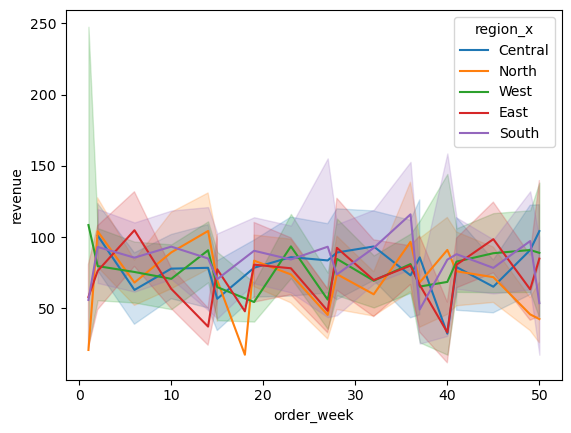

In [453]:
# Line plot - weekly revenue trends by region.
sns.lineplot(data = merged_df, x = 'order_week', y = 'revenue', hue = 'region_x')

[Text(0, 0, '93537'),
 Text(0, 0, '46931'),
 Text(0, 0, '40062'),
 Text(0, 0, '33934'),
 Text(0, 0, '24892')]

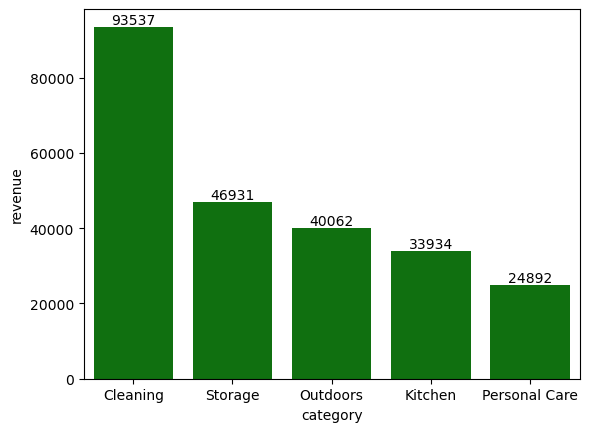

In [454]:
# Bar chart - top 5 categories by revenue.
df = merged_df.groupby('category', as_index = False)['revenue'].sum().sort_values(by = 'revenue', ascending = False).head(5).reset_index()
ax = sns.barplot(data = df, x = 'category', y = 'revenue', color = 'green')
ax.bar_label(ax.containers[0], fmt='%.0f')

<Axes: xlabel='quantity', ylabel='discount_applied'>

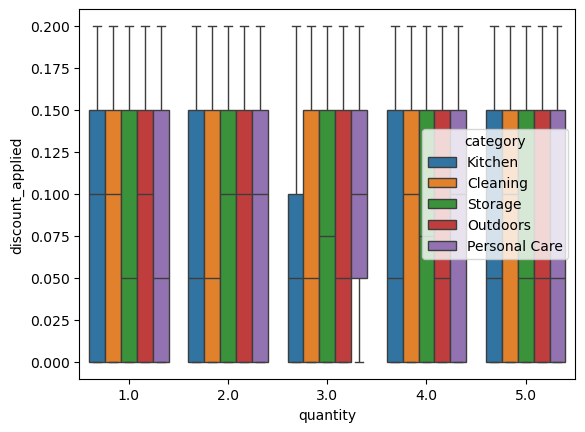

In [455]:
# Boxplot - quantity vs discount across categories.
sns.boxplot(data = merged_df, x = 'quantity', y = 'discount_applied', hue = 'category')

<Axes: >

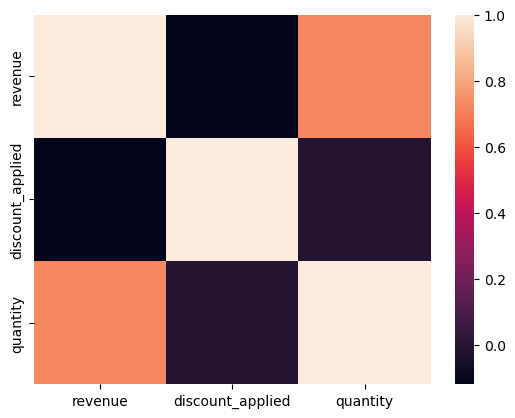

In [456]:
# Heatmap - correlation between revenue, discount, and quantity.
corr = merged_df[['revenue', 'discount_applied', 'quantity']].corr()
sns.heatmap(corr)

[Text(0, 0, '127'), Text(0, 0, '329'), Text(0, 0, '138'), Text(0, 0, '3')]

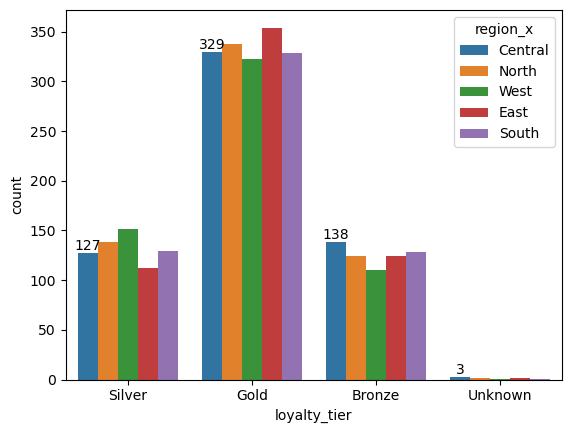

In [457]:
# Countplot - orders by loyalty tier (with hue = region).
ax = sns.countplot(data = merged_df, x = 'loyalty_tier', hue = 'region_x')
ax.bar_label(ax.containers[0], fmt='%.0f')

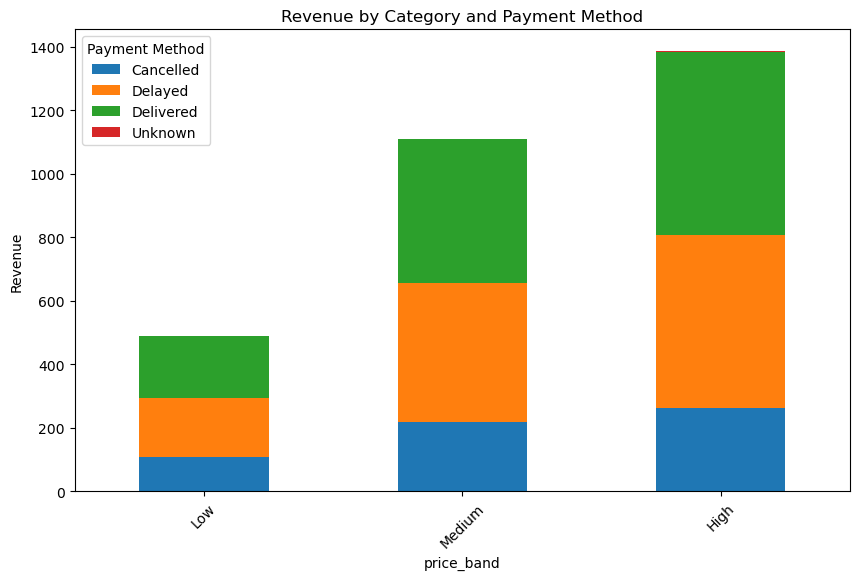

In [458]:
# Stacked bar or pie - delivery status by price band.
stacked_df = (
    merged_df[['price_band', 'delivery_status']].value_counts().unstack(fill_value = 0)
)

stacked_df.plot(
    kind = 'bar',
    stacked = True,
    figsize = (10, 6)
)

plt.ylabel('Revenue')
plt.title('Revenue by Category and Payment Method')
plt.legend(title = 'Payment Method')
plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='signup_month', ylabel='count'>

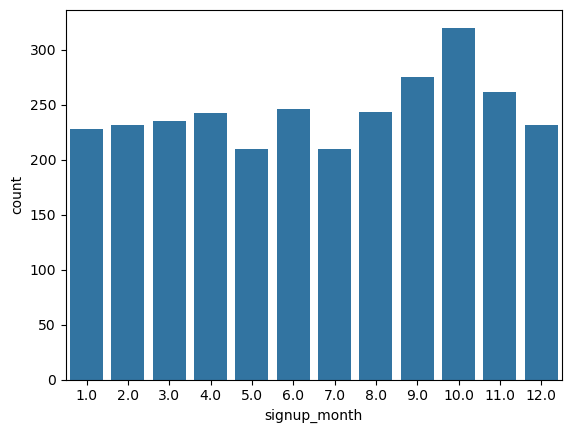

In [459]:
# Line chart - the number of signups per each month.
sns.countplot(data = merged_df, x = 'signup_month')

_**November has the mmost number of customers signing up.**_

## 7. Business Questoins to Answer

In [462]:
# Which product categories drive the most revenue, and in which regions?.
merged_df.groupby('category').agg(
    total_revenue = ('revenue', 'sum')).sort_values('total_revenue', ascending = False)

,total_revenue
category,
Cleaning,93536.5395
Storage,46931.4575
Outdoors,40062.0680
Kitchen,33933.6760
Personal Care,24892.2765


_**Cleaning products drive the most revenue overall.**_

In [464]:
merged_df.groupby('region_x')['revenue'].sum().reset_index().sort_values(by = 'revenue', ascending = False)

,region_x,revenue
3,South,49560.5725
1,East,47842.8420
4,West,47729.8220
0,Central,47444.2915
2,North,46778.4895


_**South region drives the most revenue.**_

<Axes: >

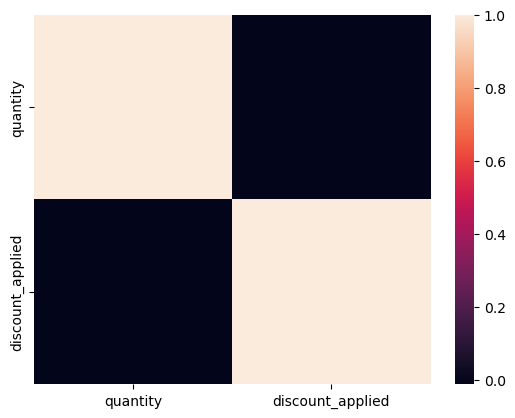

In [466]:
# Do discounts lead to more items sold?
df_corr = merged_df[['quantity', 'discount_applied']].corr()
sns.heatmap(df_corr)

_**Yes, there is strong positive relationship between discount applied and the quantity of items sold.**_

In [468]:
# Which loyalty tier generates the most value?
merged_df.groupby('loyalty_tier')['revenue'].sum().reset_index().sort_values(by = 'revenue', ascending = False)

,loyalty_tier,revenue
1,Gold,136177.1300
2,Silver,52032.6080
0,Bronze,49053.6605
3,Unknown,767.2730


_**Gold tier generates the most revenue.**_

In [470]:
# Are certain regions struggling with delivery delays?
delay_rate = (
    merged_df
        .assign(is_delayed=merged_df['delivery_status'] == 'Delayed')
        .groupby('region_x')
        .agg(
            total_orders=('order_id', 'nunique'),
            delayed_orders=('is_delayed', 'sum')
        )
)

delay_rate['delay_rate'] = delay_rate['delayed_orders'] / delay_rate['total_orders']
delay_rate.sort_values('delay_rate', ascending=False)

,total_orders,delayed_orders,delay_rate
region_x,,,
East,598,250,0.418060
Central,601,235,0.391015
North,604,236,0.390728
South,593,229,0.386172
West,588,217,0.369048


_**The East region has the highest delivery delay rate; however, delay rates across regions are relatively similar, suggesting no major regional disparity.**_

In [472]:
# Do customer signup patterns influence purchasing activity?
signup_analysis = (
    merged_df.groupby('signup_month').agg(
            customers=('customer_id', 'nunique'),
            orders=('order_id', 'nunique'),
            total_quantity=('quantity', 'sum'),
            total_revenue=('revenue', 'sum'),
            avg_order_value=('revenue', 'mean')
        ).reset_index().sort_values('signup_month')
)
signup_analysis

,signup_month,customers,orders,total_quantity,total_revenue,avg_order_value
0,1.0,38,228,635.0,17127.2195,75.119384
1,2.0,38,231,695.0,19457.9345,84.233483
2,3.0,37,235,713.0,18903.3130,80.439630
3,4.0,41,242,734.0,18767.0735,77.549890
4,5.0,40,210,636.0,17005.1630,80.976967
5,6.0,42,246,763.0,19950.3705,81.099067
6,7.0,37,210,613.0,16686.1675,79.457940
7,8.0,42,243,742.0,20169.2060,83.000848
8,9.0,44,275,845.0,22260.0040,80.945469
9,10.0,52,320,973.0,26429.8505,82.593283


_**The 10th month (October) shows great numbers across the metrics such as order quantity sold, the number of total customers, the number of total orders and total revenue. For other months there is no any significant difference.**_

## 8. Optional Strech Tasks

In [475]:
# Using .query() to extract: Customers who signed up in Q2.
merged_df['signup_quarter'] = merged_df['signup_date'].dt.quarter
merged_df.query('signup_quarter == 2')['customer_id'].nunique()

123

In [476]:
# Using .query() to extract: Customers who placed an order within 14 days.
merged_df.query('(order_date - signup_date).dt.days <= 14')['customer_id'].nunique()

119

In [477]:
# Using .query() to extract: Customers who received discount more than 20%.
merged_df.query('discount_applied > 0.2')['customer_id'].nunique()

0

In [478]:
# Using MinMaxScaler to normalise revenue or price.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_df[['revenue', 'unit_price']] = scaler.fit_transform(merged_df[['revenue', 'unit_price']])

In [479]:
# Flag underperforming products (low quantity, high discount, delayed deliveries).
df = merged_df.groupby('product_name').agg(
    total_quantity = ('quantity', 'sum'),
    avg_discount = ('discount_applied', 'mean')
)
df.sort_values(by = 'total_quantity', ascending = True).head()

,total_quantity,avg_discount
product_name,,
Outdoors Product 13,236.0,0.074375
Cleaning Product 82,238.0,0.079070
Storage Product 47,252.0,0.087879
Cleaning Product 69,264.0,0.080851
Cleaning Product 29,265.0,0.084021


In [480]:
df.query('total_quantity < 280 and avg_discount > 0.09')

,total_quantity,avg_discount
product_name,,
Personal Care Product 1,271.0,0.094022
Storage Product 37,276.0,0.096196


In [481]:
merged_df[merged_df['delivery_status'] == 'Delayed']['product_name'].value_counts()

product_name
Outdoors Product 32         50
Cleaning Product 86         50
Cleaning Product 16         47
Cleaning Product 69         46
Personal Care Product 1     46
Cleaning Product 70         45
Cleaning Product 94         45
Cleaning Product 84         45
Kitchen Product 53          43
Outdoors Product 91         42
Personal Care Product 11    42
Cleaning Product 40         42
Cleaning Product 53         41
Kitchen Product 42          41
Kitchen Product 82          41
Storage Product 87          40
Storage Product 10          38
Outdoors Product 55         37
Personal Care Product 64    37
Kitchen Product 70          37
Outdoors Product 53         35
Storage Product 37          35
Cleaning Product 29         34
Cleaning Product 82         34
Cleaning Product 72         34
Storage Product 47          33
Storage Product 50          31
Cleaning Product 85         30
Outdoors Product 13         24
Storage Product 39          22
Name: count, dtype: int64

_**Personal Care Product 1 and Storage Product 37 are flagged for having disproportionally high discounts, low quantity and high number of delayed deliveries.**_